### 海表地转流场的无辐散订正
###### 27 May 2019 by MiniUFO

---
[TOC]

---
#### 1. 提取地转流场
地转流场可以通过AVISO卫星高度计资料观测的海表高度（h）进行差分计算得到：
> $$\mathbf u_g=\frac{g}{f}\mathbf k\times\nabla h \tag{1}$$

这里我们直接使用它提供的网格产品，避免了处理赤道地区科氏参数$f$接近0的情况。但由于地转流场不是无辐散的，需要通过订正使得流场无辐散。根据Helmholtz理论，任何矢量场可以分解为旋转流场（散度为0）和辐散流场（旋度为0）两部分：
> $$\mathbf u=\nabla\phi+\mathbf k\times\nabla \psi \tag{2}$$

因此，我们可以利用MITgcm的2D solver来求解上面的流函数和势函数，即采用offline设置，并在data.diagnostics里面设置输出PsiVEL和PhiVEL。然后根据上面的**公式（2）**和流函数PsiVEL求解得到地转流$\mathbf u_\psi$。

#### 2. 计算无辐散流场
得到了流函数$\psi$需要通过求梯度得到流场，我自己写的Java差分程序包默认是采用中央差分，而MITgcm采用Arakawa C网格，如果要与模式网格兼容，需要采用前差方法。可以利用numpy的roll或者shift函数实现差分。具体步骤如下。


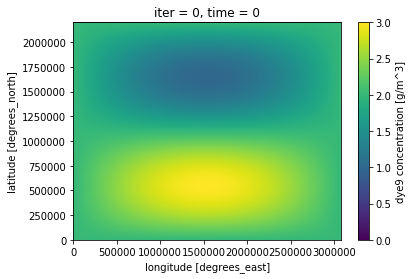

In [11]:
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt

ds  = open_mdsdataset('G:/genFLT4/', prefix='Stat', delta_t=86400)
psi = ds['TRAC09'][0,:,:]

psi.plot.imshow()
plt.show()

#### References:
https://github.com/rabernat/mitgcm_2D_global/blob/master/notebooks/correction.ipynb